# **Dicionário**

id_ocorrencia - identificação única da ocorrência

cidade - A cidade onde aconteceu a ocorrência

população - Pupulação da cidade

horario - horario da ocorrencia com data e hora

vtr - viatura empenhanha na ocorrencia

mtcl - matricula do militar ou cpf do Bombeiro comunitario

militar_bc - identificação se o individuo é Bombeiro Comunitário ou Bombeiro
Militar

bc_indenizado - Identifica se o Bombeiro Comunitario estava no serviço sendo
pago(indenizado) ou não

obm - Organização Bombeiro Militar que estava na ocorrência

coordenada_obm - Coordenada da organização Bombeiro Militar

coordenada_ocorrencia - Coordenada da Ocorrência

lat_ocorrencia - Latitude ocorrência

lon_ocorrencia - Longitude Ocorrência

tipo - Tipo da ocorrência, pode ser Atendimento pré-hospitalar - APH, incendio, acidente e outros.

subtipo - especifica o tipo, num APH, pode especificar desmaio, nem sempre é preenchido.

tempo_resposta - Tempo do acionamento até a chegada ao local da ocorrêcia, pode ser um dado que estaja bem falho, pois acontece do bombeiro esquecer de clicar no botão

tempo_total_empenho - tempo total da saída da obm até a chegada a obm novamente.
firecast - indica se uma viatura utilizou o sistema "firecast" para dar J-9, J-10, J-11 e J-12 nos deslocamentos

origem_samu - Se foi um repasse da ocorrência que era do samu

vitima - geração no sistema, talvez de pra gerar o número de vítimas, nome, idade, alguns sinais vitais.

In [1]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('Data/datasets/datasetTratadoFloripa5.csv', sep=',', thousands=',')

# Drop duplicates based on 'NrOcorrência'
X = df.drop_duplicates(subset="NrOcorrência", keep=False)

# Select the columns of interest
X = X.loc[:, ['NrOcorrência', 'Cidade', 'Data/Hora', 'lat_ocorrencia', 'lon_ocorrencia', 'TipoOcorrênciaEncerramento']]

X = X.loc[X['TipoOcorrênciaEncerramento'] == 'ATENDIMENTO PRÉ-HOSPITALAR']

X = X.loc[X["lat_ocorrencia"] >= -48.61,:]

X["Date"] = pd.to_datetime(X["Data/Hora"], infer_datetime_format=True).dt.floor('1D')

# Count the number of missing values in 'lat_ocorrencia' and 'lon_ocorrencia' columns
missing_lat = X['lat_ocorrencia'].isna().sum()
missing_lon = X['lon_ocorrencia'].isna().sum()

print("Number of missing values in 'lat_ocorrencia':", missing_lat)
print("Number of missing values in 'lon_ocorrencia':", missing_lon)

Number of missing values in 'lat_ocorrencia': 0
Number of missing values in 'lon_ocorrencia': 0


TESTES

In [3]:
X["Date"] = pd.to_datetime(X["Data/Hora"], infer_datetime_format=True).dt.floor('1D')
missing_lat = X['lat_ocorrencia'].isna().sum()
missing_lon = X['lon_ocorrencia'].isna().sum()

print("Number of missing values in 'lat_ocorrencia':", missing_lat)
print("Number of missing values in 'lon_ocorrencia':", missing_lon)
X

Number of missing values in 'lat_ocorrencia': 0
Number of missing values in 'lon_ocorrencia': 0


,NrOcorrência,Cidade,Data/Hora,lat_ocorrencia,lon_ocorrencia,TipoOcorrênciaEncerramento,Date
0,10085306.0,Florianópolis,2018-01-01 01:07:47,-48.583567,-27.603720,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01
1,10085307.0,Florianópolis,2018-01-01 01:51:00,-48.499719,-27.438892,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01
3,10085311.0,Florianópolis,2018-01-01 02:34:00,-48.430948,-27.573438,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01
4,10085313.0,Florianópolis,2018-01-01 04:56:00,-48.502000,-27.446556,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01
5,10085314.0,Florianópolis,2018-01-01 05:25:00,-48.446964,-27.609410,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01
...,...,...,...,...,...,...,...
64968,130319356.0,Florianópolis,2023-07-30 19:04:54,-48.397082,-27.452763,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30
64970,130319412.0,Florianópolis,2023-07-30 20:27:56,-48.400281,-27.456841,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30
64971,130319424.0,Florianópolis,2023-07-30 20:49:08,-48.600708,-27.595756,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30
64973,130319468.0,Florianópolis,2023-07-30 22:20:41,-48.552170,-27.598435,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30


In [3]:
X['Date'].groupby([X.Date.dt.year, X.TipoOcorrênciaEncerramento]).agg('count')


Date  TipoOcorrênciaEncerramento
2018  ATENDIMENTO PRÉ-HOSPITALAR    4522
2019  ATENDIMENTO PRÉ-HOSPITALAR    4991
2020  ATENDIMENTO PRÉ-HOSPITALAR    3698
2021  ATENDIMENTO PRÉ-HOSPITALAR    4103
2022  ATENDIMENTO PRÉ-HOSPITALAR    4525
2023  ATENDIMENTO PRÉ-HOSPITALAR    2967
Name: Date, dtype: int64

In [4]:
# Count the number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' before dropping
num_nan_before = X['lat_ocorrencia'].isnull().sum() + X['lon_ocorrencia'].isnull().sum()

# Drop the rows with NaN values in 'lat_ocorrencia' and 'lon_ocorrencia'
df_dropped = X.dropna(subset=['lat_ocorrencia', 'lon_ocorrencia'])

# Count the number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' after dropping
num_nan_after = df_dropped['lat_ocorrencia'].isnull().sum() + df_dropped['lon_ocorrencia'].isnull().sum()

# Calculate the number of rows dropped
num_rows_dropped = len(X) - len(df_dropped)

print(f"Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' before dropping: {num_nan_before}")
print(f"Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' after dropping: {num_nan_after}")
print(f"Number of rows dropped: {num_rows_dropped}")

Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' before dropping: 0
Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' after dropping: 0
Number of rows dropped: 0


In [17]:
df_dropped = df_dropped.loc[df_dropped["lat_ocorrencia"] >= -48.61,:]
df_dropped

,NrOcorrência,Cidade,Data/Hora,lat_ocorrencia,lon_ocorrencia,TipoOcorrênciaEncerramento,Date,cluster_label
0,10085306.0,Florianópolis,2018-01-01 01:07:47,-48.583567,-27.603720,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01,0
1,10085307.0,Florianópolis,2018-01-01 01:51:00,-48.499719,-27.438892,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01,1
3,10085311.0,Florianópolis,2018-01-01 02:34:00,-48.430948,-27.573438,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01,1
4,10085313.0,Florianópolis,2018-01-01 04:56:00,-48.502000,-27.446556,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01,1
5,10085314.0,Florianópolis,2018-01-01 05:25:00,-48.446964,-27.609410,ATENDIMENTO PRÉ-HOSPITALAR,2018-01-01,0
...,...,...,...,...,...,...,...,...
64968,130319356.0,Florianópolis,2023-07-30 19:04:54,-48.397082,-27.452763,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30,1
64970,130319412.0,Florianópolis,2023-07-30 20:27:56,-48.400281,-27.456841,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30,1
64971,130319424.0,Florianópolis,2023-07-30 20:49:08,-48.600708,-27.595756,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30,0
64973,130319468.0,Florianópolis,2023-07-30 22:20:41,-48.552170,-27.598435,ATENDIMENTO PRÉ-HOSPITALAR,2023-07-30,0


In [18]:
X['Date'].groupby([X.Date.dt.year, X.TipoOcorrênciaEncerramento]).agg('count')


Date  TipoOcorrênciaEncerramento
2018  ATENDIMENTO PRÉ-HOSPITALAR    4522
2019  ATENDIMENTO PRÉ-HOSPITALAR    4991
2020  ATENDIMENTO PRÉ-HOSPITALAR    3698
2021  ATENDIMENTO PRÉ-HOSPITALAR    4103
2022  ATENDIMENTO PRÉ-HOSPITALAR    4525
2023  ATENDIMENTO PRÉ-HOSPITALAR    2967
Name: Date, dtype: int64

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[3:5]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[3:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[3:5]]) # Labels of each point


Data = pd.DataFrame()
#print(Data)
#criar coluna X_dia

X['cluster_label'] = X['cluster_label'].astype('category')
v = X.groupby(['Date', 'cluster_label']).size().unstack(fill_value=0)
#binary_z = (z > 0).astype(int) #changing to binary dataset
#v = binary_z

print(v.info)

/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<bound method DataFrame.info of cluster_label  0  1  2  3
Date                     
2018-01-01     9  3  9  1
2018-01-02     5  4  3  3
2018-01-03     6  7  6  1
2018-01-04     1  6  4  2
2018-01-05     3  9  5  2
...           .. .. .. ..
2023-07-27     3  5  5  3
2023-07-28     2  8  4  1
2023-07-29     0  4  6  1
2023-07-30     3  4  3  2
2023-07-31     0  0  1  0

[2037 rows x 4 columns]>


In [4]:
v.sum(axis=0)

cluster_label
0     4582
1    11318
2     5958
3     2948
dtype: int64

In [13]:
from datetime import date
import os

output_directory = "Data/datasets"
os.makedirs(output_directory, exist_ok=True)
current_date = date.today().strftime("%Y-%m-%d")
output_filename = f"dataset_pre_processed_{current_date}.csv"
output_path = os.path.join(output_directory, output_filename)
v.to_csv(output_path, index=False)

print(f"Dataset saved to: {output_path}")


Dataset saved to: Data/datasets/dataset_pre_processed_2023-08-21.csv


In [11]:
v

cluster_label,0,1,2,3
Date,,,,
2018-01-01,9,3,9,1
2018-01-02,3,4,5,3
2018-01-03,6,7,6,1
2018-01-04,4,6,1,2
2018-01-05,5,9,3,2
...,...,...,...,...
2023-07-27,5,5,3,3
2023-07-28,4,8,2,1
2023-07-29,6,4,0,1


/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]
/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

<Figure size 0x0 with 0 Axes>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


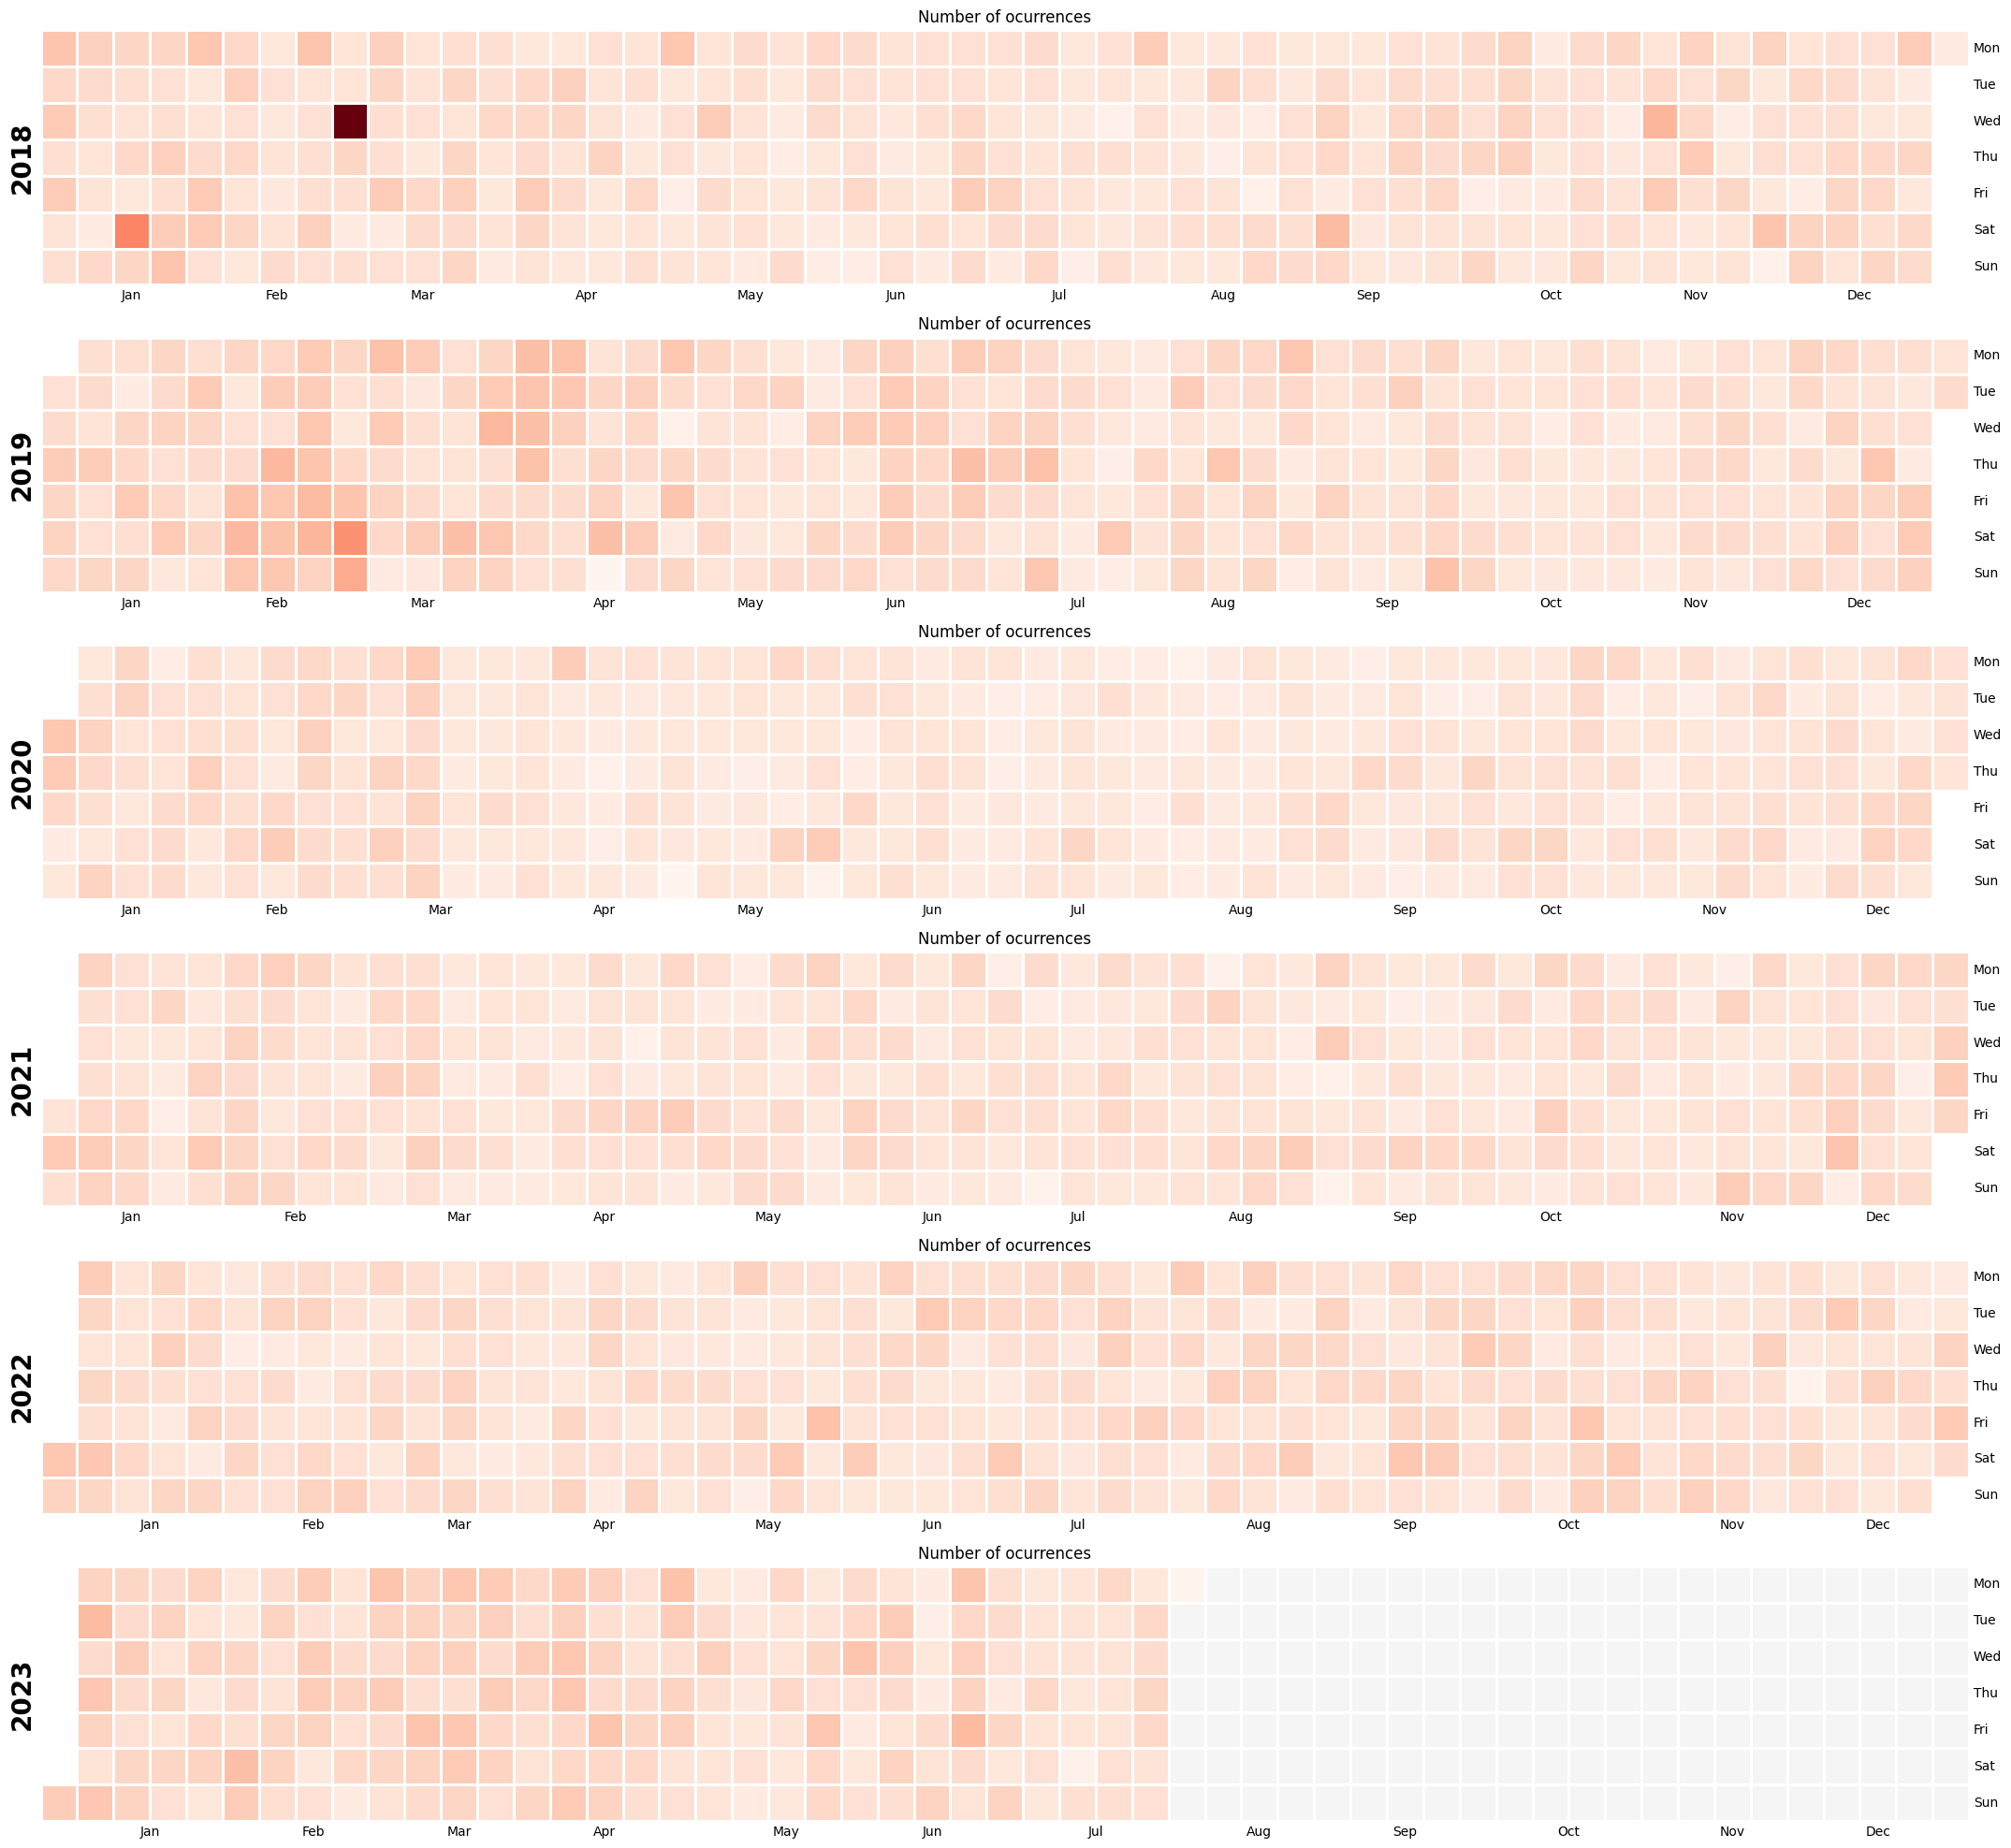

In [12]:
import matplotlib.pyplot as plt
import calmap

# Plot
plt.figure(figsize=(26,20), dpi=0)
calmap.calendarplot(v.sum(axis=1) , fig_kws={'figsize': (26,20)}, yearlabel_kws={'color':'black', 'fontsize':20}, subplot_kws={'title':'Number of ocurrences'})
plt.show()

In [5]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


training_set = v

training_set = training_set.iloc[:,:].values

print(training_set.shape)

#plt.plot(training_set, label = 'Shampoo Sales Data')
#plt.plot(training_set)
#plt.show()


# fig, axs = plt.subplots(4,1, figsize=(25,30))
# fig.tight_layout(pad = 5)
# for i in range(0,v.columns.size):
#     axs[(i)].plot(v[v.columns[i]])
#     axs[(i)].set_title(v.columns[i])

(2037, 4)


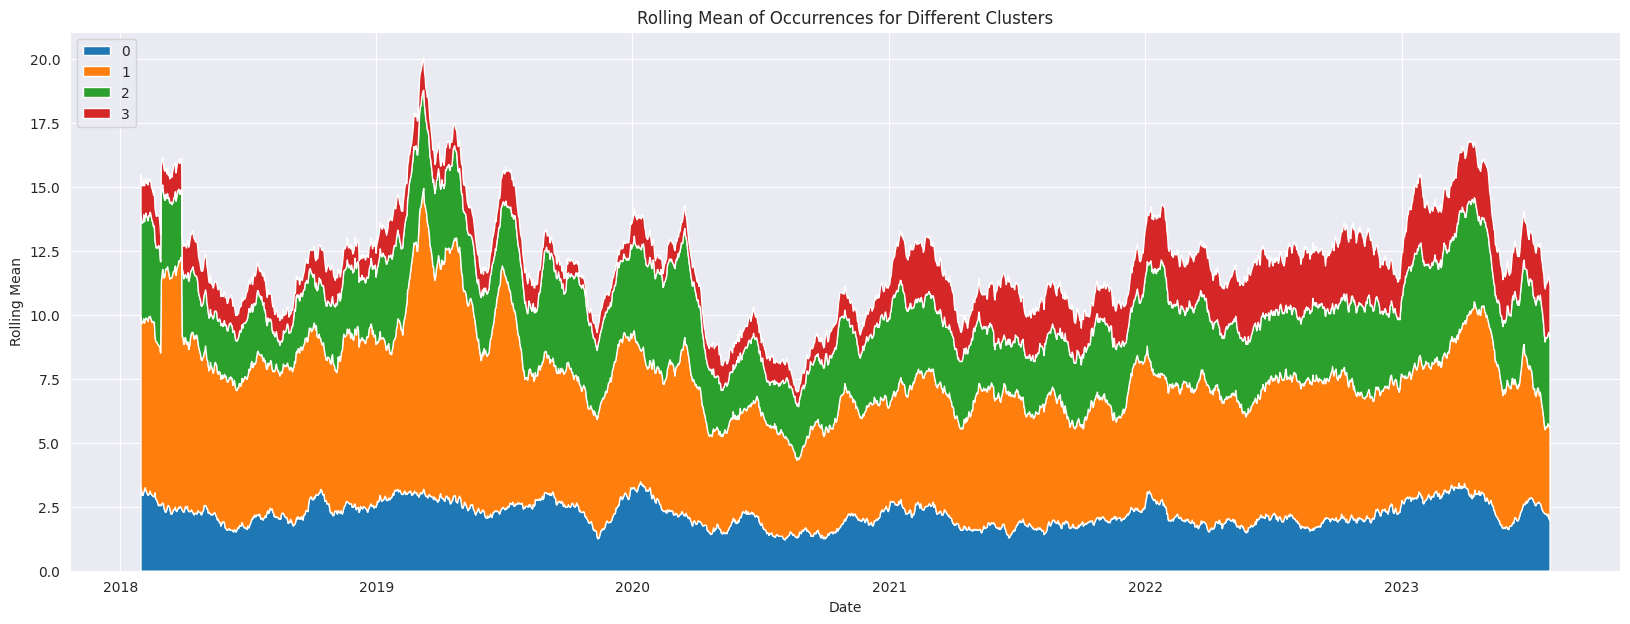

In [6]:
# Calculate the rolling mean
rolling_mean = v.rolling(window=30).mean()

# Plot the rolling mean using a stacked area plot
plt.figure(figsize=(20, 7))
plt.stackplot(rolling_mean.index, rolling_mean.values.T, labels=rolling_mean.columns)
plt.legend(loc='upper left')
plt.title('Rolling Mean of Occurrences for Different Clusters')
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
for i in range(0,v.columns.size):
	result = adfuller(v[v.columns[i]])


	#anotar
	print('ADF Statistic: %f' % result[0])
	print('p-value: %f' % result[1])
	for key, value in result[4].items():
	  print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.266412
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -5.535636
p-value: 0.000002
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -3.507869
p-value: 0.007787
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -5.666023
p-value: 0.000001
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [20]:
import numpy as np


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 6
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
#test_size = len(y) - train_size

#valição

dataX = Variable(torch.Tensor(np.array(x)))
#print(dataX.shape)
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))

testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)




torch.Size([1421, 6, 4])
torch.Size([1421, 4])
torch.Size([406, 6, 4])
torch.Size([406, 4])


In [26]:
import optuna


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

def objective(trial):
    input_size = 4
    hidden_size = trial.suggest_int("hidden_size", 1, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
  
    num_epochs = 500   
    num_layers=1
    num_classes = 4
    
    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    print('passei aqui 1')
    criterion = torch.nn.L1Loss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    
    #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)
    
    # Train the model
    iter_no=0
    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        
        #limpa os grandientes
        optimizer.zero_grad()
        
        # obtain the loss function
        loss = criterion(outputs, trainY)
        loss.backward()
        
        optimizer.step()
        
        iter_no += 1
        
        #validation
        outputs_val = lstm(valX)
        loss_val = criterion(outputs_val, valY)
        
        if epoch % 100 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
            print("Epoch: %d, val_loss: %1.5f" % (epoch, loss_val.item()))
            #plt.plot(epoch,running_loss)
            #writer.flush()
            print(loss)
    return loss
            
if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=3)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("Value: ", trial.value)
    print("Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")

    best_hidden_size = trial.params["hidden_size"]
    best_learning_rate = trial.params["learning_rate"]

    print("Best Hyperparameters:")
    print(f"Hidden Size: {best_hidden_size}")
    print(f"Learning Rate: {best_learning_rate}")

[I 2023-08-30 12:20:25,337] A new study created in memory with name: no-name-13f2684b-92b1-467f-b200-c23a2c45f3cc
/tmp/ipykernel_548544/726431419.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)


passei aqui 1
Epoch: 0, loss: 0.23816
Epoch: 0, val_loss: 0.24511
tensor(0.2382, grad_fn=<MeanBackward0>)
Epoch: 100, loss: 0.09758
Epoch: 100, val_loss: 0.11567
tensor(0.0976, grad_fn=<MeanBackward0>)
Epoch: 200, loss: 0.09737
Epoch: 200, val_loss: 0.11561
tensor(0.0974, grad_fn=<MeanBackward0>)
Epoch: 300, loss: 0.09667
Epoch: 300, val_loss: 0.11612
tensor(0.0967, grad_fn=<MeanBackward0>)
Epoch: 400, loss: 0.09578
Epoch: 400, val_loss: 0.11648
tensor(0.0958, grad_fn=<MeanBackward0>)


[I 2023-08-30 12:20:27,311] Trial 0 finished with value: 0.09559066593647003 and parameters: {'hidden_size': 10, 'learning_rate': 0.0011054240535380959}. Best is trial 0 with value: 0.09559066593647003.


passei aqui 1
Epoch: 0, loss: 0.23928
Epoch: 0, val_loss: 0.25547
tensor(0.2393, grad_fn=<MeanBackward0>)
Epoch: 100, loss: 0.18888
Epoch: 100, val_loss: 0.20465
tensor(0.1889, grad_fn=<MeanBackward0>)
Epoch: 200, loss: 0.15771
Epoch: 200, val_loss: 0.17532
tensor(0.1577, grad_fn=<MeanBackward0>)
Epoch: 300, loss: 0.12976
Epoch: 300, val_loss: 0.14835
tensor(0.1298, grad_fn=<MeanBackward0>)


[I 2023-08-30 12:20:28,318] Trial 1 finished with value: 0.09781625866889954 and parameters: {'hidden_size': 1, 'learning_rate': 2.62448063312914e-05}. Best is trial 0 with value: 0.09559066593647003.


Epoch: 400, loss: 0.10500
Epoch: 400, val_loss: 0.12366
tensor(0.1050, grad_fn=<MeanBackward0>)
passei aqui 1
Epoch: 0, loss: 0.16298
Epoch: 0, val_loss: 0.17271
tensor(0.1630, grad_fn=<MeanBackward0>)
Epoch: 100, loss: 0.14487
Epoch: 100, val_loss: 0.15785
tensor(0.1449, grad_fn=<MeanBackward0>)
Epoch: 200, loss: 0.12852
Epoch: 200, val_loss: 0.14551
tensor(0.1285, grad_fn=<MeanBackward0>)
Epoch: 300, loss: 0.11880
Epoch: 300, val_loss: 0.13683
tensor(0.1188, grad_fn=<MeanBackward0>)
Epoch: 400, loss: 0.11050
Epoch: 400, val_loss: 0.12858
tensor(0.1105, grad_fn=<MeanBackward0>)


[I 2023-08-30 12:20:29,281] Trial 2 finished with value: 0.10399685055017471 and parameters: {'hidden_size': 2, 'learning_rate': 1.1151817711071095e-05}. Best is trial 0 with value: 0.09559066593647003.


Number of finished trials:  3
Best trial:
Value:  0.09559066593647003
Params: 
    hidden_size: 10
    learning_rate: 0.0011054240535380959
Best Hyperparameters:
Hidden Size: 10
Learning Rate: 0.0011054240535380959


Epoch: 0, loss: 0.18090
Epoch: 0, val_loss: 0.14471
Epoch: 100, loss: 0.10009
Epoch: 100, val_loss: 0.12050
Epoch: 200, loss: 0.09888
Epoch: 200, val_loss: 0.12236
Epoch: 300, loss: 0.09663
Epoch: 300, val_loss: 0.11736
Epoch: 400, loss: 0.09658
Epoch: 400, val_loss: 0.11943
tensor(0.0962, grad_fn=<MeanBackward0>)


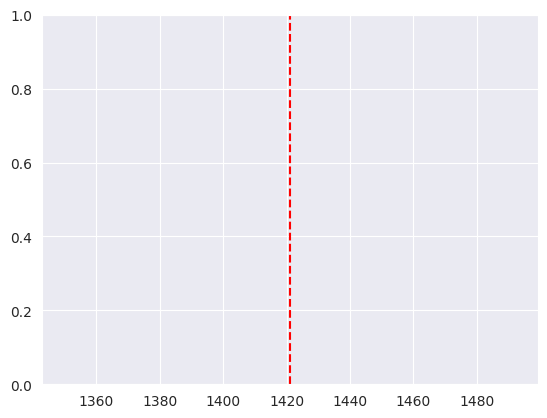

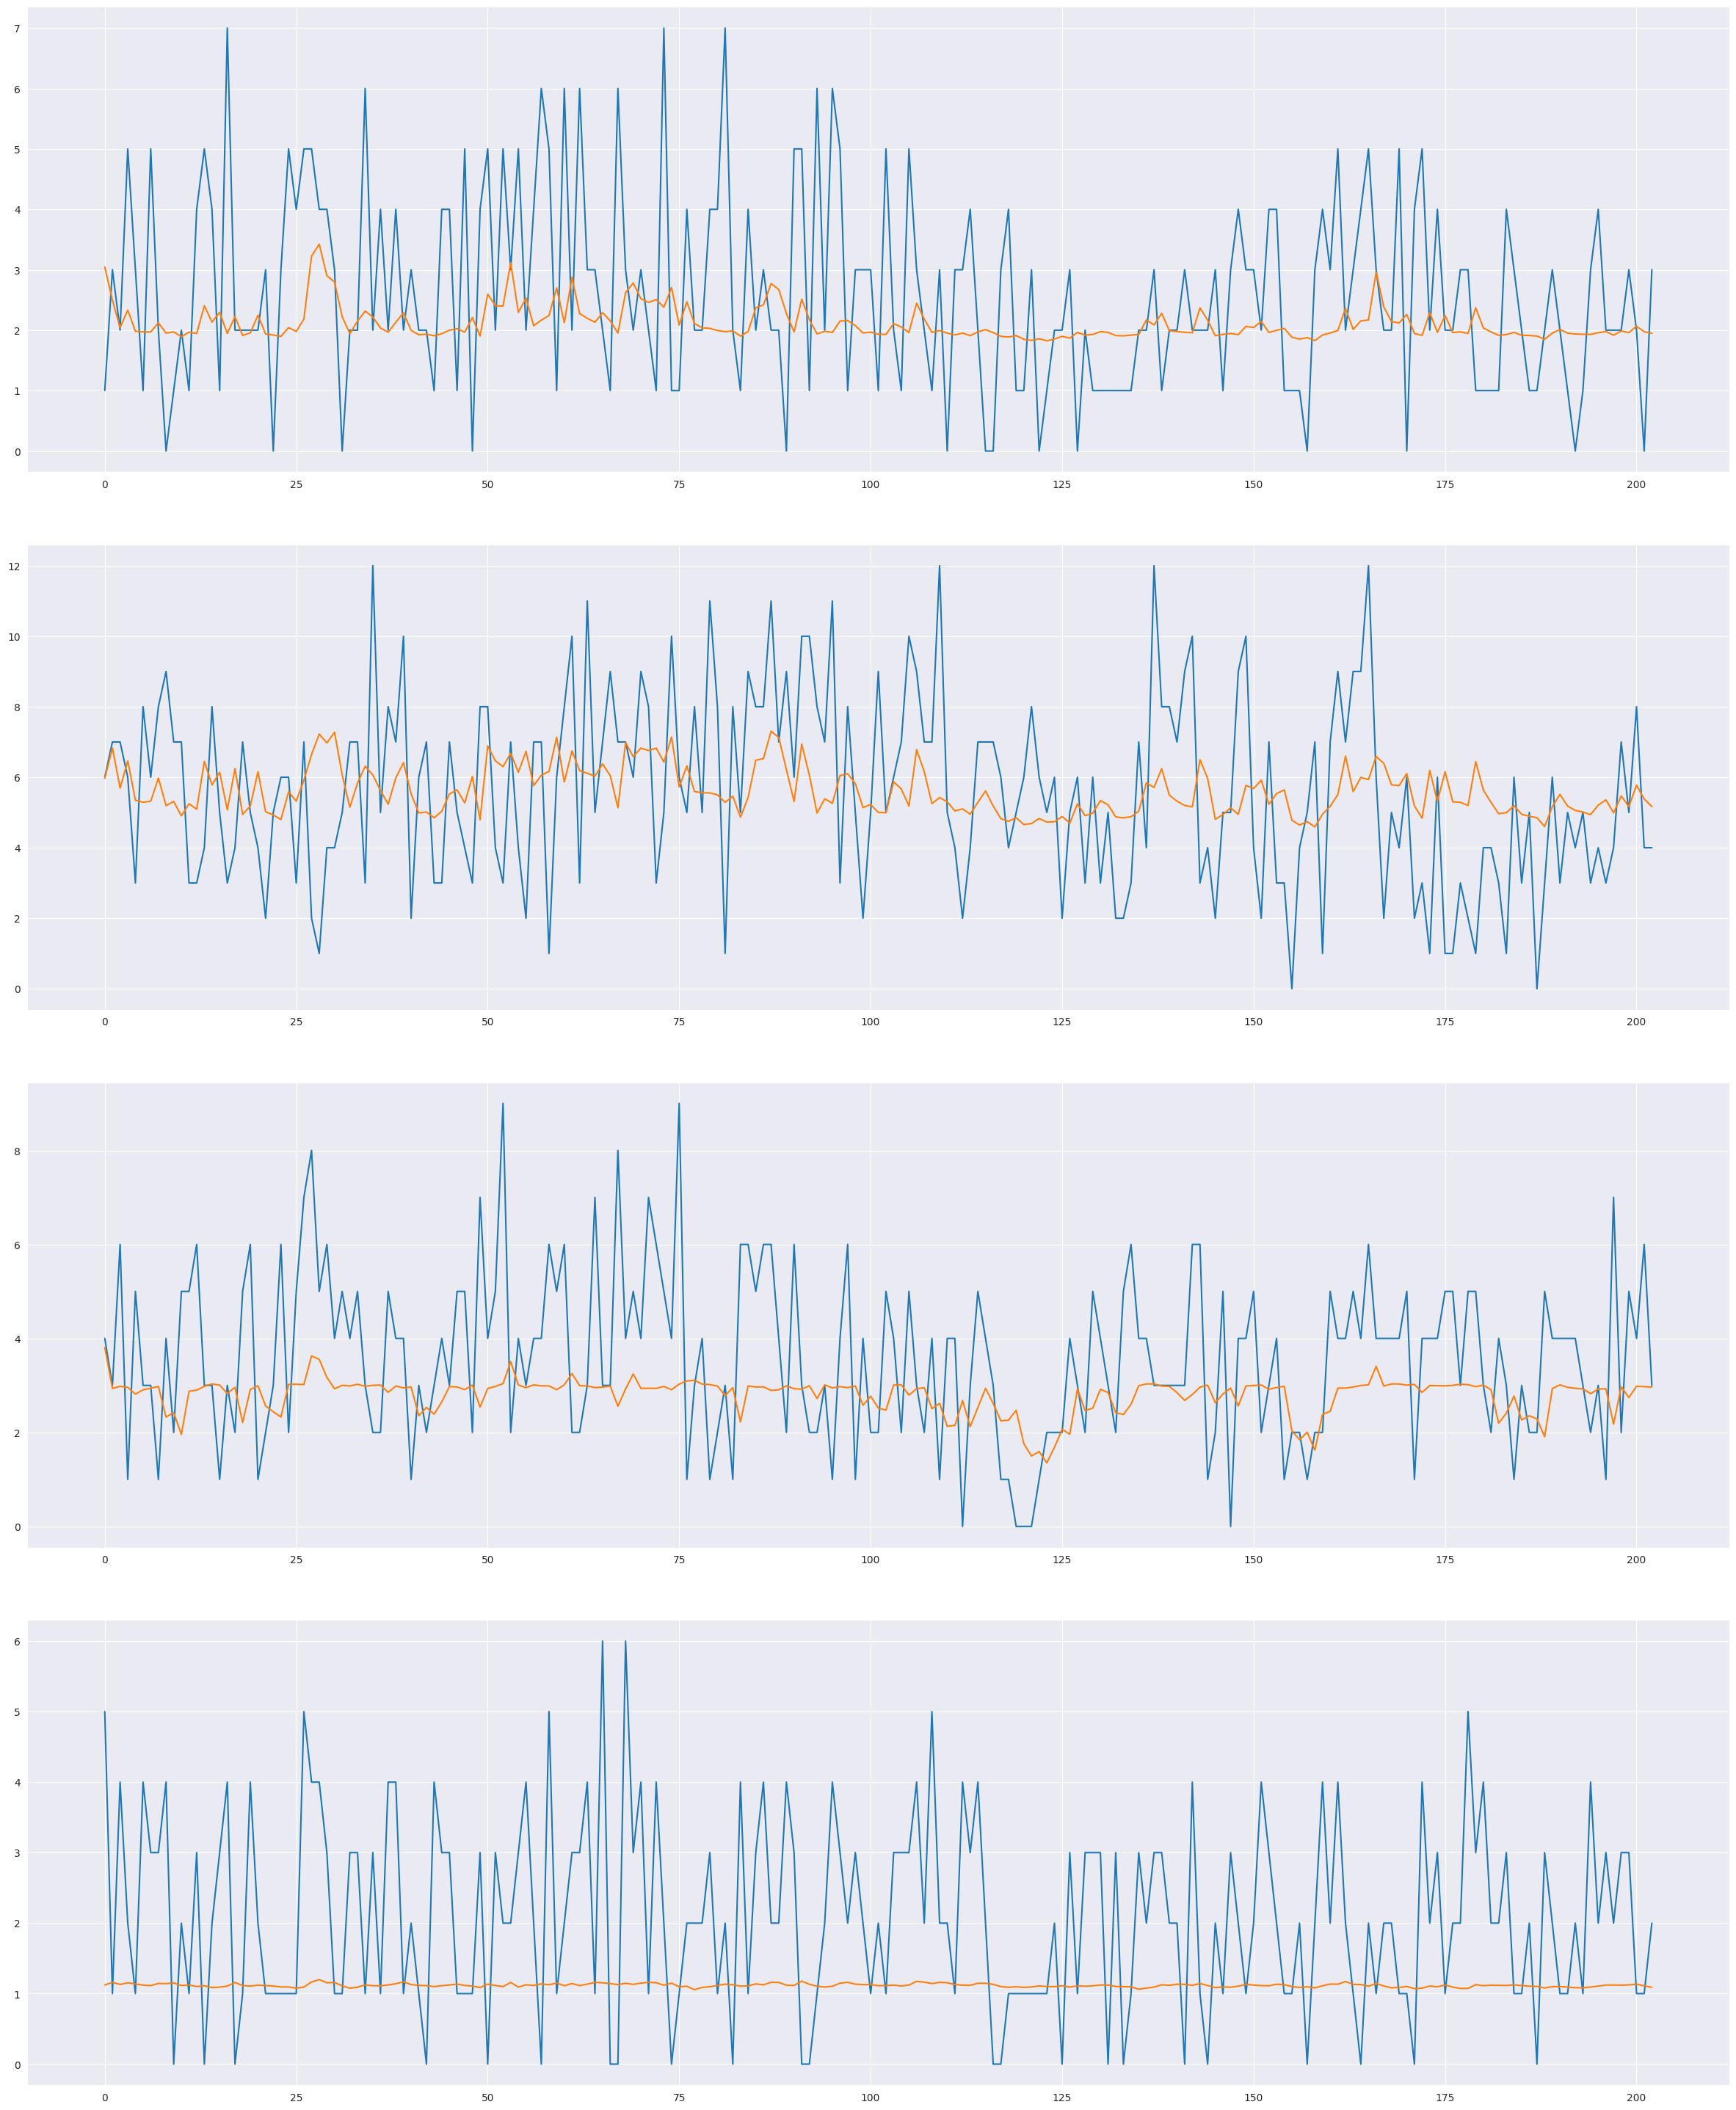

In [10]:

lstm.eval()
train_predict = lstm(testX)

data_predict = train_predict.data.numpy()
dataY_plot = testY.data.numpy()

data_predict = sc.inverse_transform(data_predict)

dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

#plt.plot(dataY_plot[:,1:2])
"""
plt.plot(dataY_plot[:,0:1])
plt.plot(data_predict[:,0:1])
plt.suptitle('Time-Series Prediction')
plt.show()
"""

#z=dataY_plot[:,0]-data_predict[:,0]




fig, axs = plt.subplots(4,1, figsize=(25,30))
fig.tight_layout(pad = 5)

for i in range(0,4):
    axs[(i)].plot(dataY_plot[:,i] )
    axs[(i)].plot(data_predict[:,i] )

plt.show()